In [57]:
from tqdm.auto import tqdm
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd
import string
import re
from sklearn.model_selection import train_test_split
from sklearn import model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn import metrics
import datetime
import scipy.stats 

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [58]:
from google.colab import drive

# Mounting Drive inside the Colab notebook
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
#df1 = pd.read_csv("/Users/julianalexander/Library/Mobile Documents/com~apple~CloudDocs/HSG/1. Semester MBI FS2021/8,049,1.00 Text Mining mit Python/TextMining21/Reddit_Julian_TOTAL-klassifiziert.csv")
#df2 = pd.read_csv("/Users/julianalexander/Library/Mobile Documents/com~apple~CloudDocs/HSG/1. Semester MBI FS2021/8,049,1.00 Text Mining mit Python/TextMining21/Reddit_Marek_klassifiziert.csv")
#df3 = pd.read_csv("/Users/julianalexander/Library/Mobile Documents/com~apple~CloudDocs/HSG/1. Semester MBI FS2021/8,049,1.00 Text Mining mit Python/TextMining21/Reddit_Yonas_Total_Klassifiziert.csv")

In [60]:
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Reddit_Julian_TOTAL-klassifiziert.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Reddit_Marek_klassifiziert.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Reddit_Yonas_Total_Klassifiziert.csv")

dfBTC = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Bitcoin-Kurs.csv", parse_dates=['Date'], index_col = 'Date')
submissionsDF = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Reddit24062021.csv", parse_dates=['Date'], index_col = 'Date')

In [61]:
Atweets = pd.concat([df1, df2, df3], axis=0, join='inner')
Atweets = Atweets.sort_values(by='index')
Atweets = Atweets.reset_index(drop=True)

# **Preprocessing**

Punktuierung

In [62]:
def remove_punctuation(txt):
    txt_nopunt = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunt

In [63]:
Atweets["submission"] = Atweets["submission"].apply(lambda x: remove_punctuation(x))

Tokenisierung

In [64]:
def tokenize(txt):
    tokens = re.split("\W+", txt)
    return tokens

In [65]:
Atweets["submissions_tokenized"] = Atweets["submission"].apply(lambda x: tokenize(x.lower()))

Stopwörter

In [66]:
stopwords = nltk.corpus.stopwords.words("english")

In [67]:
stopwords.append("ll")
stopwords.append("im")
stopwords.append("youre")
stopwords.append("youve")
stopwords.append("youll")
stopwords.append("youd")
stopwords.append("shes")
stopwords.append("its")
stopwords.append("thatll")
stopwords.append("dont")
stopwords.append("shouldve")
stopwords.append("arent")
stopwords.append("couldnt")
stopwords.append("didnt")
stopwords.append("doesnt")
stopwords.append("hadnt")
stopwords.append("havent")
stopwords.append("isnt")
stopwords.append("mightnt")
stopwords.append("neednt")
stopwords.append("shant")
stopwords.append("shouldnt")
stopwords.append("wasnt")
stopwords.append("werent")
stopwords.append("wont")
stopwords.append("wouldnt")

In [68]:
def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

In [69]:
Atweets["submission_no_stopwords"] = Atweets["submissions_tokenized"].apply(lambda x: remove_stopwords(x))

Stemming

In [70]:
ps = PorterStemmer()

In [71]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [72]:
Atweets["submission_stemmed"] = Atweets["submission_no_stopwords"].apply(lambda x: stemming(x))

Lemmatisierung

In [73]:
wn = nltk.WordNetLemmatizer()

In [74]:
def lemmatization(token_txt):
    text = [wn.lemmatize(word) for word in token_txt]
    return text

In [75]:
Atweets["submission_lemmatized"] = Atweets["submission_no_stopwords"].apply(lambda x: lemmatization(x))

# Classifier & Feature Extraction

# A. Train & Test-Set

In [76]:
Atweets["submission_cleaned"] = " "

for i in range(0, len(Atweets) - 1):
  Atweets.loc[i,"submission_cleaned"] = " ".join(Atweets.loc[i,"submission_stemmed"])

In [77]:
Corpus = Atweets.loc[:, "submission_cleaned"].values

In [78]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus,Atweets['sentiment'],test_size=0.2)

In [79]:
Train_Y_1 = Train_Y
Test_Y_1 = Test_Y

Train_Y_2 = Train_Y
Test_Y_2 = Test_Y

Train_Y_1 = np.where(Train_Y_1 == 1.0, 0, Train_Y_1)
Train_Y_1 = np.where(Train_Y_1 == 2.0, 0, Train_Y_1)
Train_Y_1 = np.where(Train_Y_1 == 3.0, 1, Train_Y_1)
Train_Y_1 = np.where(Train_Y_1 == 4.0, 0, Train_Y_1)
Train_Y_1 = np.where(Train_Y_1 == 5.0, 0, Train_Y_1)

Train_Y_2 = np.where(Train_Y_2 == 1.0, 1, Train_Y_2)
Train_Y_2 = np.where(Train_Y_2 == 2.0, 1, Train_Y_2)
Train_Y_2 = np.where(Train_Y_2 == 3.0, 2, Train_Y_2)
Train_Y_2 = np.where(Train_Y_2 == 4.0, 3, Train_Y_2)
Train_Y_2 = np.where(Train_Y_2 == 5.0, 3, Train_Y_2)


Test_Y_1 = np.where(Test_Y_1 == 1.0, 0, Test_Y_1)
Test_Y_1 = np.where(Test_Y_1 == 2.0, 0, Test_Y_1)
Test_Y_1 = np.where(Test_Y_1 == 3.0, 1, Test_Y_1)
Test_Y_1 = np.where(Test_Y_1 == 4.0, 0, Test_Y_1)
Test_Y_1 = np.where(Test_Y_1 == 5.0, 0, Test_Y_1)

Test_Y_2 = np.where(Test_Y_2 == 1.0, 1, Test_Y_2)
Test_Y_2 = np.where(Test_Y_2 == 2.0, 1, Test_Y_2)
Test_Y_2 = np.where(Test_Y_2 == 3.0, 2, Test_Y_2)
Test_Y_2 = np.where(Test_Y_2 == 4.0, 3, Test_Y_2)
Test_Y_2 = np.where(Test_Y_2 == 5.0, 3, Test_Y_2)

# B. Feature Extraction: TF-IDF-Vectorizer

In [80]:
Tfidf_vect = TfidfVectorizer(max_features=12842)
Tfidf_vect.fit(Corpus)
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

## B.1. Naive Bayes Classifier (MultinomialNB)

In [81]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y_2)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y_2)*100)

Naive Bayes Accuracy Score ->  74.20965058236273


**Precision, Recall & F-score**

In [82]:
# precision_recall_fscore_support(predictions_NB, Test_Y_2, average='weighted')

In [83]:
mnb_scores = precision_recall_fscore_support(Test_Y_2, predictions_NB, average='weighted')
print(f'Naives Bayes Precision Score: {mnb_scores[0]*100:.2f}%')
print(f'Naives Bayes Recall Score: {mnb_scores[1]*100:.2f}%')
print(f'Naives Bayes F-Score Score: {mnb_scores[2]*100:.2f}%')

Naives Bayes Precision Score: 55.07%
Naives Bayes Recall Score: 74.21%
Naives Bayes F-Score Score: 63.22%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Naive Bayes Predictions - Confusion Matrix**

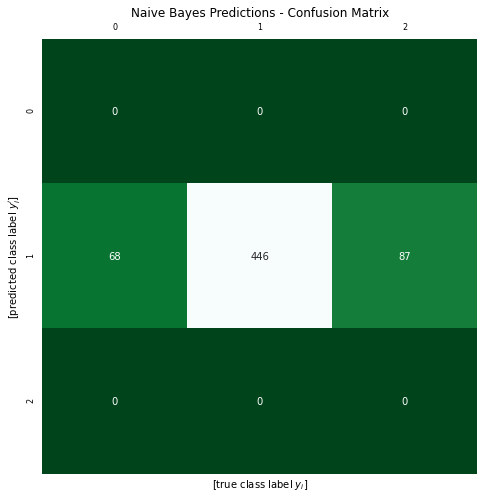

In [84]:
# determine the prediction confusion matrix
mat = confusion_matrix(Test_Y_2, predictions_NB)

# init the plot
plt.figure(figsize=(8, 8))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r')

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# add plot title
plt.title('Naive Bayes Predictions - Confusion Matrix');

## B.2. Support Vector Machines Classifier (SVM)

In [85]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto', random_state = 123)
SVM.fit(Train_X_Tfidf,Train_Y_2)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
# print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y_2)*100)
SVM_accuracy = accuracy_score(predictions_SVM, Test_Y_2)*100
print(f'SVM Accuracy Score: {SVM_accuracy:.2f}%')

SVM Accuracy Score: 75.37%


**Precision, Recall & F-score**

In [86]:
# precision_recall_fscore_support(predictions_SVM, Test_Y_2, average='weighted')

In [87]:
svm_scores = precision_recall_fscore_support(Test_Y_2, predictions_SVM, average='weighted')
print(f'SVM Precision Score: {svm_scores[0]*100:.2f}%')
print(f'SVM Recall Score: {svm_scores[1]*100:.2f}%')
print(f'SVM F-Score Score: {svm_scores[2]*100:.2f}%')

SVM Precision Score: 71.74%
SVM Recall Score: 75.37%
SVM F-Score Score: 67.02%


**SVM Predictions - Confusion Matrix**

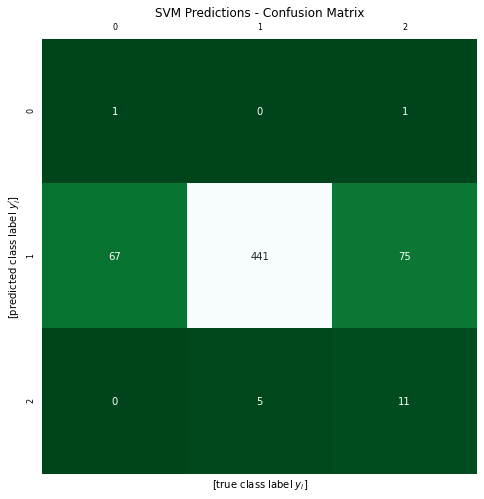

In [88]:
# determine the prediction confusion matrix
mat = confusion_matrix(Test_Y_2, predictions_SVM)

# init the plot
plt.figure(figsize=(8, 8))


# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r')

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# add plot title
plt.title('SVM Predictions - Confusion Matrix');

# C. Feature Extraction: CountVectorizer

In [89]:
vectorizer = CountVectorizer(min_df = 0.05, stop_words='english', ngram_range = (1,1))
X = vectorizer.fit_transform(Corpus)

X = X.toarray()

## C.1. Support Vector Machines Classifier (SVM)

In [90]:
# Creating an obect containing parametrisation setup for SVM 
svm = SVC(kernel='poly', degree = 2, C=100, random_state=123)

vectorizer.fit(Corpus)
Train_X_count = vectorizer.transform(Train_X)
Test_X_count = vectorizer.transform(Test_X)

# Training an SVM model with parameters set in the previous  step
svm.fit(Train_X_count, Train_Y_2)

# Calculating model predictions on evaluation data
y_pred = svm.predict(Test_X_count)

# Accuracy on evaluation data
eval_accuracy = metrics.accuracy_score(Test_Y_2, y_pred) * 100
print(f'Model classification accuracy: {eval_accuracy:.2f}%')

Model classification accuracy: 70.05%


**Precision, Recall & F-score**

In [91]:
# precision_recall_fscore_support(Test_Y_2, y_pred, average='weighted')

In [92]:
svm_scores_2 = precision_recall_fscore_support(Test_Y_2, y_pred, average='weighted')
print(f'SVM Precision Score: {svm_scores_2[0]*100:.2f}%')
print(f'SVM Recall Score: {svm_scores_2[1]*100:.2f}%')
print(f'SVM F-Score Score: {svm_scores_2[2]*100:.2f}%')

SVM Precision Score: 65.66%
SVM Recall Score: 70.05%
SVM F-Score Score: 67.25%


**SVM Predictions - Confusion Matrix**

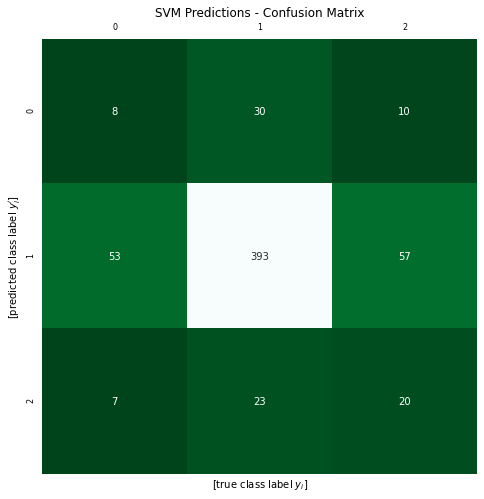

In [93]:
# determine the prediction confusion matrix
mat = confusion_matrix(Test_Y_2, y_pred)

# init the plot
plt.figure(figsize=(8, 8))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r')

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# add plot title
plt.title('SVM Predictions - Confusion Matrix');

# D. Hierarchical Classification (1. Naive Bayes, 2. SVM)

## D.1. First-Classification in Neutral/Non-Neutral with Naive Bayes (MultinomialNB)

In [94]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y_1)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y_1)*100)

Naive Bayes Accuracy Score ->  74.20965058236273


**Precision, Recall & F-score**

In [95]:
# precision_recall_fscore_support(predictions_NB, Test_Y_1, average='weighted')

In [96]:
mnb_scores_2 = precision_recall_fscore_support(Test_Y_1, predictions_NB, average='weighted')
print(f'Naives Bayes Precision Score: {mnb_scores_2[0]*100:.2f}%')
print(f'Naives Bayes Recall Score: {mnb_scores_2[1]*100:.2f}%')
print(f'Naives Bayes F-Score Score: {mnb_scores_2[2]*100:.2f}%')

Naives Bayes Precision Score: 55.07%
Naives Bayes Recall Score: 74.21%
Naives Bayes F-Score Score: 63.22%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Naive Bayes Predictions - Confusion Matrix**

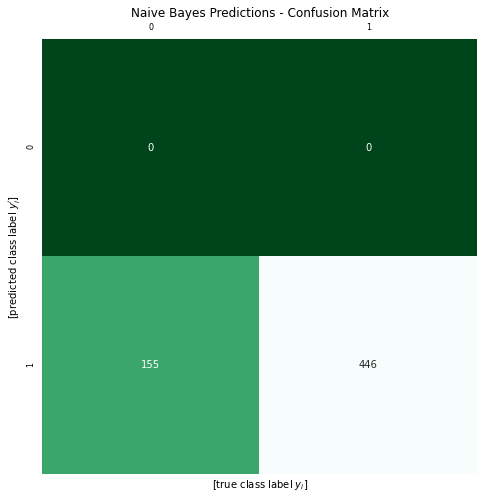

In [97]:
# determine the prediction confusion matrix
mat = confusion_matrix(Test_Y_1, predictions_NB)

# init the plot
plt.figure(figsize=(8, 8))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r')

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# add plot title
plt.title('Naive Bayes Predictions - Confusion Matrix');

## D.2. Hierarchical Classification 1: Neutral/Non-Neutral with Support Vector Machines (SVM)

In [98]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM_hierarchical_1 = SVC(C=100, kernel='linear', degree=3, gamma='auto', random_state = 123)
SVM_hierarchical_1.fit(Train_X_Tfidf,Train_Y_1)
# predict the labels on validation dataset
predictions_SVM = SVM_hierarchical_1.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y_1)*100)

SVM Accuracy Score ->  69.21797004991681


**Precision, Recall & F-score**

In [99]:
# precision_recall_fscore_support(predictions_SVM, Test_Y_1, average='weighted')

In [100]:
svm_scores_3 = precision_recall_fscore_support(Test_Y_1, predictions_SVM, average='weighted')
print(f'SVM Precision Score: {svm_scores_3[0]*100:.2f}%')
print(f'SVM Recall Score: {svm_scores_3[1]*100:.2f}%')
print(f'SVM F-Score Score: {svm_scores_3[2]*100:.2f}%')

SVM Precision Score: 66.91%
SVM Recall Score: 69.22%
SVM F-Score Score: 67.84%


**SVM Predictions - Confusion Matrix**

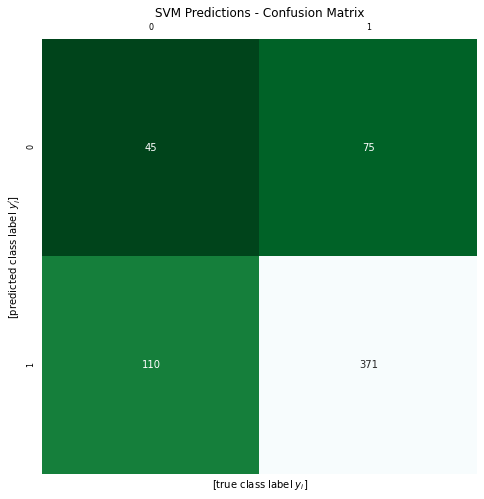

In [101]:
# determine the prediction confusion matrix
mat = confusion_matrix(Test_Y_1, predictions_SVM)

# init the plot
plt.figure(figsize=(8, 8))


# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r')

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# add plot title
plt.title('SVM Predictions - Confusion Matrix');

## D.3. Hierarchical Classification 2: Positive/Negative with Support Vector Machines (SVM)

In [102]:
indices_train = Train_Y_2 != 2
indices_test = Test_Y_2 != 2

In [103]:
Train_Y_2 = Train_Y_2[indices_train]
Train_X = Train_X[indices_train]

Test_Y_2 = Test_Y_2[indices_test]
Test_X = Test_X[indices_test]

In [104]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM_hierarchical_2 = SVC(C=1000, kernel='poly', degree=3, gamma='auto', random_state = 123)

Train_X_count = vectorizer.transform(Train_X)
Test_X_count = vectorizer.transform(Test_X)

SVM_hierarchical_2.fit(Train_X_count,Train_Y_2)
# predict the labels on validation dataset
predictions_SVM = SVM_hierarchical_2.predict(Test_X_count)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y_2)*100)

SVM Accuracy Score ->  55.483870967741936


**Precision, Recall & F-score**

In [105]:
# precision_recall_fscore_support(predictions_SVM, Test_Y_2, average='weighted')

In [106]:
svm_scores_4 = precision_recall_fscore_support(Test_Y_2, predictions_SVM, average='weighted')
print(f'SVM Precision Score: {svm_scores_4[0]*100:.2f}%')
print(f'SVM Recall Score: {svm_scores_4[1]*100:.2f}%')
print(f'SVM F-Score Score: {svm_scores_4[2]*100:.2f}%')

SVM Precision Score: 53.48%
SVM Recall Score: 55.48%
SVM F-Score Score: 51.50%


**SVM Predictions - Confusion Matrix**

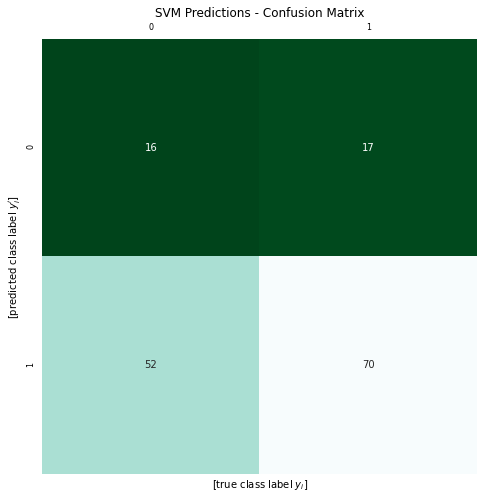

In [107]:
# determine the prediction confusion matrix
mat = confusion_matrix(Test_Y_2, predictions_SVM)

# init the plot
plt.figure(figsize=(8, 8))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r')

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# add plot title
plt.title('SVM Predictions - Confusion Matrix');

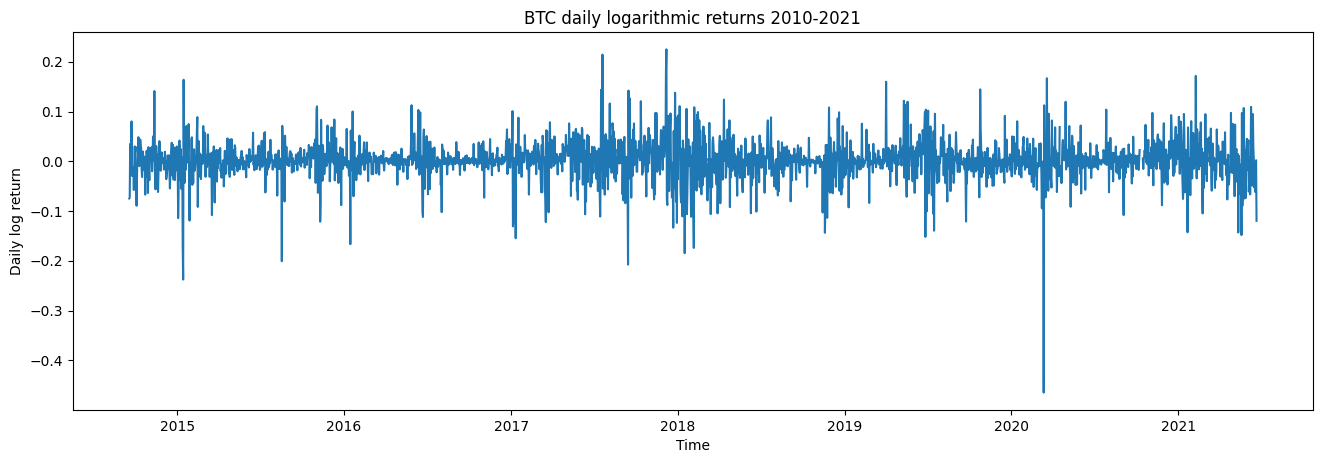

In [108]:
dfBTC['log_return'] = np.log(dfBTC.Close) - np.log(dfBTC.Close.shift(1))
dfBTC['log_return2'] = dfBTC.log_return ** 2

plt.figure(figsize=(16, 5), dpi= 100 )
plt.plot(dfBTC.index, dfBTC['log_return'], color='tab:blue')
plt.gca().set(title="BTC daily logarithmic returns 2010-2021", xlabel="Time", ylabel="Daily log return")
plt.show()

In [109]:
dfBTC

,Open,High,Low,Close,Adj Close,Volume,log_return,log_return2
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,-0.074643,0.005572
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,-0.072402,0.005242
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,0.035111,0.001233
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,-0.024968,0.000623
...,...,...,...,...,...,...,...,...
2021-06-17,38341.421875,39513.671875,37439.675781,38053.503906,38053.503906,3.709667e+10,-0.007685,0.000059
2021-06-18,38099.476563,38187.261719,35255.855469,35787.246094,35787.246094,3.620089e+10,-0.061402,0.003770
2021-06-19,35854.527344,36457.796875,34933.062500,35615.871094,35615.871094,3.120728e+10,-0.004800,0.000023


In [110]:
dates = dfBTC.index.values
dates = [datetime.datetime.date(datetime.datetime.utcfromtimestamp(date.tolist()/1e9)) for date in dates]

subDates = submissionsDF.index.values
subDates = [datetime.datetime.date(datetime.datetime.utcfromtimestamp(date.tolist()/1e9)) for date in subDates]

submissionsDF.index = subDates

# E Sentiment vs volatility comparison

**Calculating average sentiment for single days**

In [111]:
j = 0
for date in dates:
  # EXtracting submissions for current date
  currentDF = submissionsDF[submissionsDF.index == date]
  currentDF = currentDF.reset_index(drop=True)

  if len(currentDF) == 0:
    dfBTC.loc[pd.to_datetime(date),"Sentiment"] = np.NaN
    continue

  #Preprocessing
  currentDF["Submission"] = currentDF["Submission"].apply(lambda x: remove_punctuation(x))
  currentDF["Submission"] = currentDF["Submission"].apply(lambda x: tokenize(x.lower()))
  currentDF["Submission"] = currentDF["Submission"].apply(lambda x: remove_stopwords(x))
  currentDF["Submission"] = currentDF["Submission"].apply(lambda x: stemming(x))

  for i in range(0, len(currentDF)):
    currentDF.loc[i,"Submission"] = " ".join(currentDF.loc[i,"Submission"])

  vect = Tfidf_vect.transform(currentDF.loc[:,"Submission"].values)
  pred1 = SVM_hierarchical_1.predict(vect)

  vect = vectorizer.transform(currentDF.loc[:,"Submission"].values)
  pred2 = SVM_hierarchical_2.predict(vect)

  for i in range(0, len(currentDF)):
    if pred1[i] == 1:
      currentDF.loc[i,"Sentiment"] = 0
    else:
      currentDF.loc[i,"Sentiment"] = pred2[i] - 2

  dfBTC.loc[pd.to_datetime(date),"Sentiment"] = currentDF.loc[:,"Sentiment"].values.mean()

  j = j + 1
print(dfBTC) 

dfBTC = dfBTC.dropna()

                    Open          High  ...  log_return2  Sentiment
Date                                    ...                        
2014-09-17    465.864014    468.174011  ...          NaN   0.100000
2014-09-18    456.859985    456.859985  ...     0.005572   0.114583
2014-09-19    424.102997    427.834991  ...     0.005242   0.210084
2014-09-20    394.673004    423.295990  ...     0.001233   0.151899
2014-09-21    408.084991    412.425995  ...     0.000623   0.208955
...                  ...           ...  ...          ...        ...
2021-06-17  38341.421875  39513.671875  ...     0.000059   0.049020
2021-06-18  38099.476563  38187.261719  ...     0.003770   0.079545
2021-06-19  35854.527344  36457.796875  ...     0.000023   0.156627
2021-06-20  35563.140625  36059.484375  ...     0.000005   0.159574
2021-06-21  35641.144531  35721.640625  ...     0.014285   0.267045

[2470 rows x 9 columns]


**Correlation between squared daily returns and sentiment**

In [112]:
scipy.stats.pearsonr(dfBTC.log_return2.values, dfBTC.Sentiment.values)

(0.13650344667868874, 1.3034482696153139e-11)